In [1]:
import numpy as np
import pandas as pd
import torch

import plotly.graph_objects as go

rng = np.random.default_rng()

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
import sys
sys.path.append('../') # now can access entire repository, (important when running locally)

In [4]:
#from orbit_datasets import neworbits, versatileorbits, staticorbits
from ldcl.data.physics import get_dataset

# Plotting Different variations in input conserved quantities

In [49]:
#train_orbits_dataset = versatileorbits.OrbitsDataset()
# train_orbits_dataset = get_dataset("../data_configs/phi0_vary.json", "../../saved_datasets")[0]
# train_orbits_dataset = get_dataset("../data_configs/H_vary.json", "../../saved_datasets")[0]
# train_orbits_dataset = get_dataset("../data_configs/L_vary.json", "../../saved_datasets")[0]

H_orbits_dataset = get_dataset("vary_orbit_jsons/H_vary.json", "../../saved_datasets")[0]
L_orbits_dataset = get_dataset("vary_orbit_jsons/L_vary.json", "../../saved_datasets")[0]
phi0_orbits_dataset = get_dataset("vary_orbit_jsons/phi0_vary.json", "../../saved_datasets")[0]

Current dE:  [1.59933408e-06]
eccentricity:  [0.99997006]
data generation failed.


In [82]:
def ax_plot(ax, orbits_dataset, title, idxs=[0,1]):
    ax.set(xlim=(-4, 4), ylim=(-3, 3))
    ax.set_title(title)
    for orbit_i in range(20):
        ax.scatter(orbits_dataset.data[orbit_i,:,idxs[0]], orbits_dataset.data[orbit_i,:,idxs[1]], alpha=.6, s = 5) # position
        #ax.scatter(train_orbits_dataset.data[orbit_i,:,2], train_orbits_dataset.data[orbit_i,:,3], alpha=.3) # momentum

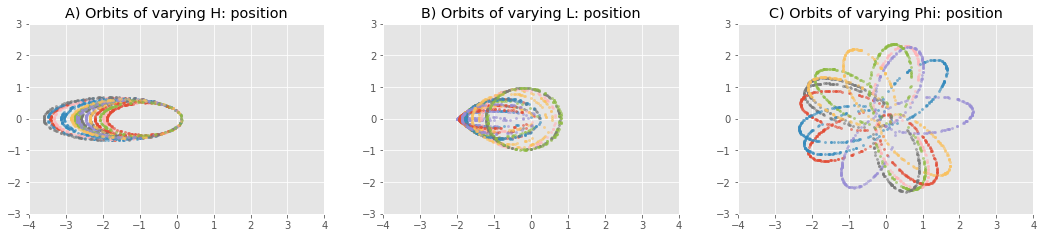

In [86]:
fig, axs = plt.subplots(1,3)

ax_plot(axs[0], H_orbits_dataset, 'A) Orbits of varying H: position')
ax_plot(axs[1], L_orbits_dataset, 'B) Orbits of varying L: position')
ax_plot(axs[2], phi0_orbits_dataset, 'C) Orbits of varying Phi: position')


# ax_plot(axs[1,0], H_orbits_dataset, 'D) Orbits of varying H: momentum',idxs = [2,3])
# ax_plot(axs[1,1], L_orbits_dataset, 'E) Orbits of varying L: momentum',idxs = [2,3])
# ax_plot(axs[1,2], phi0_orbits_dataset, 'F) Orbits of varying Phi: momentum',idxs = [2,3])




fig.set_size_inches(18, 3.5, forward=True)
plt.savefig('vary_orbit_position.png', dpi=100, bbox_inches='tight')


# Orbit Density visualization

In [9]:
train_orbits_dataset = get_dataset("../data_configs/single_orbit.json", "../../saved_datasets")[0]

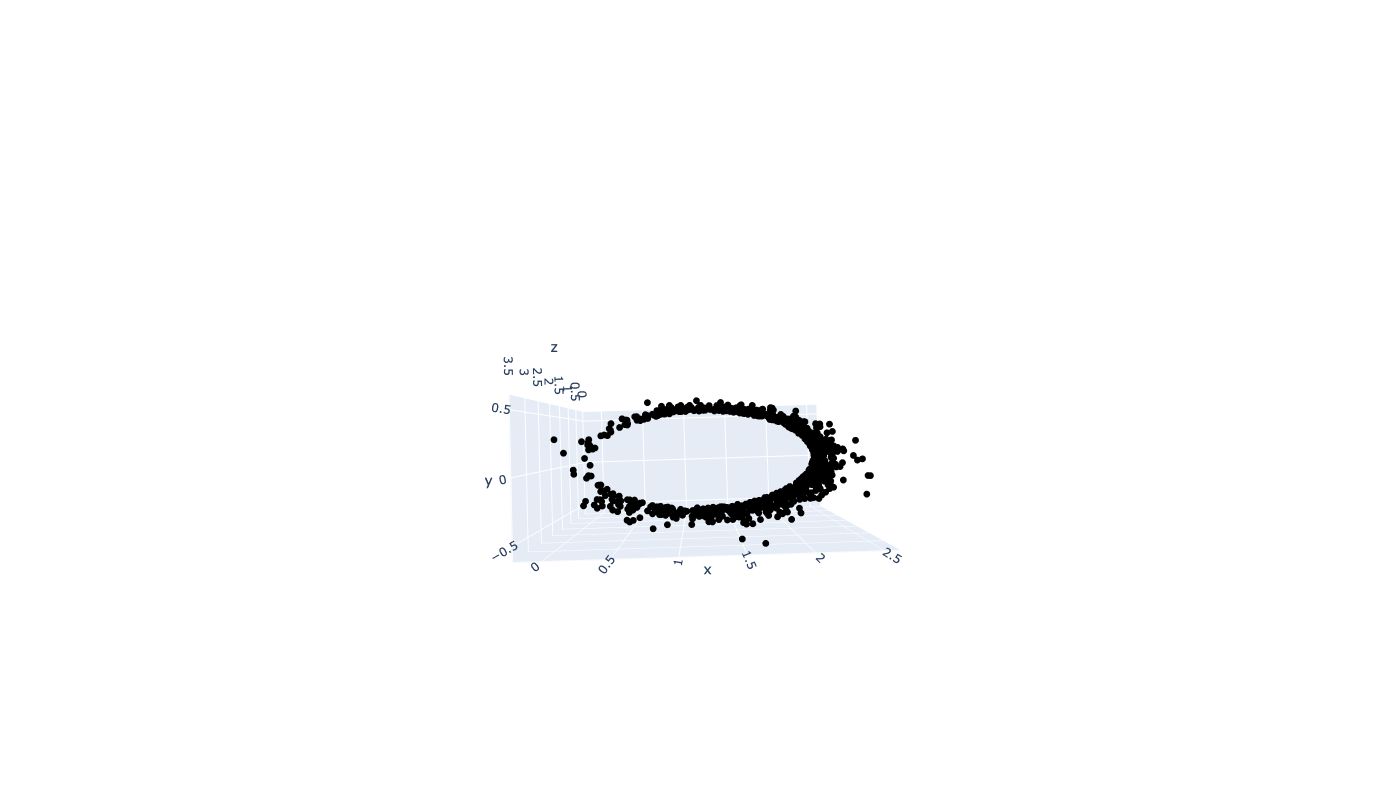

In [10]:
num = 100
fig = go.Figure(
    data=[go.Scatter3d(
    x=train_orbits_dataset.data[:num,:,0].flatten(),
    y=train_orbits_dataset.data[:num,:,1].flatten(),
    z=np.abs(rng.standard_normal(np.shape(train_orbits_dataset.data)[1] * num)),
    mode='markers',
    marker=dict(
        size=4,
        color='black',
        line=dict(width=0)
    )#,
    #text=labels
)],
layout=go.Layout(height=800, width=1000))
fig.show()